In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import keras as K

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist
(x_train,y_train),(x_test, y_test)= mnist.load_data()


In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3941],cmap=plt.cm.binary) # cambiando el numero vemos a la imagen que corresponde
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
print(x_train.shape) # shape del dataset
x_train.shape[0] # obtiene el valor de la forma del arreglo de  la posicion 0

(60000, 28, 28)


60000

In [7]:
print(y_train[3941])

3


In [8]:
print(x_train.ndim) # dimensiones del array 
print(x_train.shape)

3
(60000, 28, 28)


In [9]:
print(x_train.dtype)# tipo de datos

uint8


In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # shape (6000,28,28,1) tamaño foto y canal gris 1
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1) # forma de la foto
# Todos los valores deben ser float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# SE normaliza con 255 para estar entre 1 y 0
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D




model = Sequential() # se crea el modelo
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) # se alimenta con shape 28,28,1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # se Flattening el arreglo para la salida
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax)) # salida de 10

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.2082 - accuracy: 0.9370
Epoch 2/10
60000/60000 [==============================] - 38s 635us/sample - loss: 0.0827 - accuracy: 0.9749
Epoch 3/10
60000/60000 [==============================] - 37s 615us/sample - loss: 0.0580 - accuracy: 0.9818
Epoch 4/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.0441 - accuracy: 0.9856
Epoch 5/10
60000/60000 [==============================] - 38s 629us/sample - loss: 0.0359 - accuracy: 0.9881
Epoch 6/10
60000/60000 [==============================] - 38s 626us/sample - loss: 0.0272 - accuracy: 0.9909
Epoch 7/10
60000/60000 [==============================] - 38s 635us/sample - loss: 0.0264 - accuracy: 0.9910
Epoch 8/10
60000/60000 [==============================] - 38s 641us/sample - loss: 0.0207 - accuracy: 0.9928
Epoch 9/10
60000/60000 [==============================] - 39s 649us/sample - loss: 0.0190 - accuracy: 0.9934
Epoch 10/10
60000/6

In [12]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 2s 229us/sample - loss: 0.0528 - accuracy: 0.9862


[0.052843894855488814, 0.9862]

9
(1, 28, 28, 1)


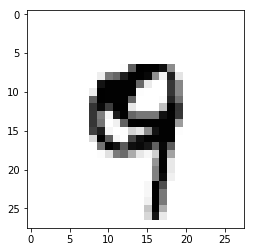

In [433]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
x_prueba=x_test[image_index].reshape(1, 28, 28, 1)
print(x_prueba.shape) # formato shape  para predecir en el modelo
#print(x_prueba)

In [15]:
model.summary() # ver como esta formado el modelo NN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [17]:
model.save("digikerascv.h5") # salvamos el modelo entrenado

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

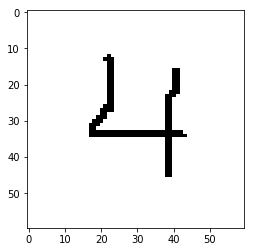

In [448]:
img=mpimg.imread('imaged4.png')
imgplot = plt.imshow(img)

In [961]:
import PIL
from PIL import Image # modulo para redimencionar y manejar imagenes
from PIL import ImageOps
from PIL import ImageEnhance


In [1104]:

imagen = (Image.open('imaged4.png').convert("L"))# convierte la imagen a grises
#imagen = ImageOps.grayscale(imagen)
#fn = lambda x : 255 if x > 210 else 0 # funcion convierte de blanco y negro basado en un limite
#imagen = imagen.convert('L').point(fn, mode='1')
imagen = imagen.resize((28,28),resample=PIL.Image.NEAREST)
imagen= ImageOps.autocontrast(imagen,cutoff=200,ignore=None)
imagen= ImageOps.invert(imagen)
#imagen= ImageEnhance.Brightness(imagen)
#imagen = imagen.resize((28,28),resample=PIL.Image.NEAREST)
#imagen= ImageEnhance.Contrast(imagen)
#imagen= ImageOps.colorize(imagen,"black","white", mid=None, blackpoint=0, whitepoint=255, midpoint=127)
#imagen = np.resize(imagen, (28,28,1))

imagenA= np.asarray(imagen)
imagenA=imagenA.reshape(1,28,28,1)

#im2arr = np.array(imagen)
#im2arr = im2arr.reshape(1,28,28,1)
#y_pred = model.predict_classes(im2arr)
#print(y_pred)
#imagen = np.asarray(Image.open('imaged8.jpg').convert('L'))# convierte la imagen a grises
#print("imagen forma inicial ",imagen.shape)
#imagen= Image.fromarray(imagen) # convierte un np array a formato Image
#print("imagen forma fromarray ",imagen.format())
#imagen = ImageOps.grayscale(imagen)
#ImageOps.colorize(imagen, (0,0,0), (255,255,255))
#imagen= ImageOps.autocontrast(imagen,cutoff=0,ignore=255) # para dar mucho contraste a la foto y dejar el fondo blanco
#imagen= imagen.convert("1") # convierte la imagen a blanco y negro
#fn = lambda x : 255 if x > 192 else 0 # funcion convierte de blanco y negro basado en un limite
#imagenA = imagenA.convert('L').point(fn, mode='1')


In [1105]:
#imagen= imagen.reshape(1,28,28,1)
#imagen = imagen.resize((1,28,28,1),PIL.Image.NEAREST)
np.shape(imagen)
#print(imagenA)


(28, 28)

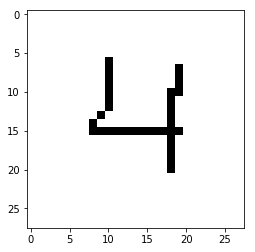

In [1106]:
#plt.imshow(imagenA.reshape(28,28))
plt.imshow(imagenA.reshape(28,28),cmap='Greys') # se vuelve a dimencionar solo para graficar

In [1107]:
# im_final = im_gray_invert.reshape(1,28,28,1)# arreglo para otro modelo
# file=np.array(image).reshape((3,224,224))
#img= np.array(imagen).reshape( 28*28, )
#img = np.array (imagen).reshape((1,28,28))# arreglo para este modelo
#img = np.array(img).reshape(1,784)

In [1108]:
#img.shape
imagenA=(imagenA)/255 # ya  dividir por 255 para escalar los grises
print(imagenA)

[[[[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]


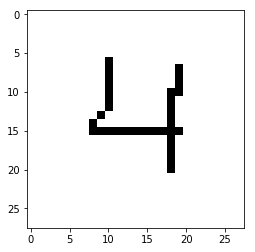

In [1109]:
plt.imshow(imagenA.reshape(28,28),cmap='Greys')

In [1110]:
#print("img",img.shape)

predic_num= model.predict(imagenA)

#print("x_test",x_test[22].shape)
#x_testshape= x_test[22].reshape((1,784)) # se redimenciona para convertilo de (784, ) a (1,784)
#print("x_testshape",x_testshape.shape) # si predice si es de la forma (1,784)
#predic_numt= model.predict(x_testshape)
#print(x_testshape)


In [1111]:
print(predic_num)

[[6.7841396e-14 1.5081794e-09 1.3041925e-13 1.5899608e-14 1.0000000e+00
  1.2553360e-12 6.2158221e-13 3.5163201e-09 1.8243226e-13 7.2947053e-14]]


In [1112]:
#print(" numero de prueba ",np.argmax(predic_numt))
print(" num de la foto ",np.argmax(predic_num))

 num de la foto  4


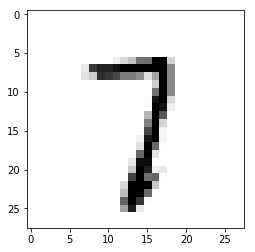

In [1023]:
x_prueba=x_test[234].reshape(1, 28, 28, 1)
#xtestshape = np.array (x_testshape).reshape((28,28))
plt.imshow(x_prueba.reshape(28,28),cmap='Greys')
#plt.imshow(x_prueba)

In [1009]:
#imprueba = np.array (img).reshape((28,28))
#plt.imshow(imprueba)

In [1010]:
from keras.models import load_model
# cargando el modelo ya entrenado
modelonuevo= tf.keras.models.load_model('digikerascv.h5') # se cargo el modelo nuevo ya entrenado con sus pesos.
#modelnuevo= load_model("digikeras.h5",False,False)
    

In [1012]:
predic_numN= modelonuevo.predict(x_prueba) # se uso el modelo cargado y entrenado

In [1013]:
print(predic_numN)

[[1.07124820e-09 1.92341759e-06 8.77732191e-07 4.88801390e-07
  3.36451145e-10 1.65016317e-11 1.97310171e-17 9.99996662e-01
  1.46245664e-08 3.45220776e-08]]


In [1014]:
print(" numero de prueba ",np.argmax(predic_numN))

 numero de prueba  7
